# (Exploration of Flight Dataset)
## by (BAMIGBOLA VICTOR)

## Introduction
> The dataset is from Data Expo 2009. It comprises of flight operation details i.e Arrival and Departure of all flight within USA, starting from October 1987 to April 2008. We have the dataset divided into each year which can be downloaded on there website. There website address is as follows https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7.
However, for the sake of this analysis we would limit the dataset to 3 years which are from 2006 to 2008 due to how big the dataset his for the whole years.


> Some of the question this analysis is going to answer are as follows:

> UNIVARIANT EXPLORATION
1. Which of the carrier had the highest cancellation?
2. Most common reason for flight cancellation
3. Which of the month had the highest cancellation out of all the years?
4. Which of the Day of the week had the highest cancellation out of all the years?
5. Which of the Year had the highest cancellation out of all the years?
6. What is the distribution of Arrival Delay in the dataset?
7. What is the distribution of departure delay in the dataset
8. Which of the carriers had the most delays at arrival?

> BIVARIANT EPLORATION
1. Exploring the relationship between Departure Time and Taxi Out Time using scatter plot
2. Exploring the relationship between the Departure Delay and Arrival Delay
3. Exploring the most cancellation by month using cancellation code (To see if cancellation has anything to do with season or month)
4. Exploring the most cancellation by Day of week using cancellation code (To see if cancellation has anything to do with days of the week)
5. Exploring the most cancellation by Year using cancellation code (To see if cancellation has anything to do with Year)
6. Exploring the relationship between the flight Distance and Average Arrival Delay
7. Exploring Carrier's productivity with respect to Arrival Time

> MULTIVARIANT EXPLORATION
1. (i) What is the trend of each delay factors from month to month? 
   (ii) Which delay factors has the highest effect on flight delays? 
   (iii) Do we have huge variation in any of the delay factors?
2. (i) What is the trend of each delay factors from Day of week to Day of week ?
   (ii) Which delay factors has the highest effect on flight delays?
   (iii) Do we have huge variation in any of the delay factors?
3. (i) What is the trend of each delay factors from year to year ?
   (ii) Which delay factors has the highest effect on flight delays?
   (iii) Do we have huge variation in any of the delay factors?
   
> Also, we would use the following variables to answer the questions above in this analysis:
1.    year
2.    month
3.    day_of_month
4.    day_of_week
5.    unique_carrier
6.    arrival_delay
7.    departure_delay
8.    taxi_in_time
9.    taxi_out_time
10.   cancellation_code
11.   carrier_delay
12.   destination_airport code
13.   carrier_delay
14.   weather_delay
15.   nas_delay
16.   security_delay
17.   late_aircraft_delay


## Preliminary Wrangling
We would do a small data wrangling my renaming the column header so as to have consistency in the column headers.


In [50]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.patches as mpatches
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#Read CSV files for years 2006,2007 and 2008 into individual dataframes
flight_2008=pd.read_csv('2008_files_22.csv')
flight_2007=pd.read_csv('2007_files_21.csv')
flight_2006=pd.read_csv('2006_files_20.csv')

In [3]:
#Append all three dataframes and save into master df
flight_data=flight_2006.append([flight_2007,flight_2008])

C:\Users\user\AppData\Local\Temp\ipykernel_13952\4255612878.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flight_data=flight_2006.append([flight_2007,flight_2008])


In [4]:
# To display the Result of the code
flight_data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27.0,19.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27.0,12.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,2008,4,17,4,1025.0,1025,1234.0,1237,DL,1207,...,5.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389213,2008,4,17,4,1319.0,1320,1527.0,1524,DL,1208,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389214,2008,4,17,4,1335.0,1335,1556.0,1553,DL,1209,...,7.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389215,2008,4,17,4,1933.0,1935,2140.0,2141,DL,1210,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [5]:
# To display all the columns of the dataset without hidding anyone
flightDataDisplayLimit=pd.set_option('display.max_columns', None)

In [6]:
# To display the data type of the dataset
flight_data.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [7]:
# To show the missing values in the dataset
flight_data.isna().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                347124
CRSDepTime                  0
ArrTime                386143
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                 42474
ActualElapsedTime      386143
CRSElapsedTime           1405
AirTime                386143
ArrDelay               386143
DepDelay               347124
Origin                      0
Dest                        0
Distance                    0
TaxiIn                  70096
TaxiOut                 64442
Cancelled                   0
CancellationCode     16637229
Diverted                    0
CarrierDelay          1804634
WeatherDelay          1804634
NASDelay              1804634
SecurityDelay         1804634
LateAircraftDelay     1804634
dtype: int64

In [8]:
#Changing column names to a more meaningful header
flight_data=flight_data.rename(columns={'Year':'year','Month':'month','DayofMonth':'day_of_month','DayOfWeek':'day_of_week','DepTime':'actual_dep_time','CRSArrTime':'scheduled_arrival_time','CRSDepTime':'scheduled_departure_time','TaxiIn':'taxi_in_time','TaxiOut':'taxi_out_time','ArrDelay':'arrival_delay','Dest':'destination_airport_code','DepDelay':'departure_delay','AirTime':'air_time','ActualElapsedTime':'actual_elapsed_time','ArrTime':'arrival_time','UniqueCarrier':'unique_carrier','FlightNum':'flight_number','TailNum':'tail_number','CarrierDelay':'carrier_delay','WeatherDelay':'weather_delay','SecurityDelay':'security_delay','LateAircraftDelay':'late_aircraft_delay','CancellationCode':'cancellation_code','Cancelled':'cancelled','Diverted':'diverted','Distance':'distance','Origin':'origin','CRSElapsedTime':'CRS_elapsed_time','NASDelay':'nas_delay'})

In [9]:
# To display the Result of the code
flight_data

,year,month,day_of_month,day_of_week,actual_dep_time,scheduled_departure_time,arrival_time,scheduled_arrival_time,unique_carrier,flight_number,tail_number,actual_elapsed_time,CRS_elapsed_time,air_time,arrival_delay,departure_delay,origin,destination_airport_code,distance,taxi_in_time,taxi_out_time,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27.0,19.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27.0,12.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,2008,4,17,4,1025.0,1025,1234.0,1237,DL,1207,N393DA,129.0,132.0,108.0,-3.0,0.0,BOS,CVG,752,5.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389213,2008,4,17,4,1319.0,1320,1527.0,1524,DL,1208,N952DL,128.0,124.0,107.0,3.0,-1.0,CVG,BOS,752,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389214,2008,4,17,4,1335.0,1335,1556.0,1553,DL,1209,N392DA,141.0,138.0,103.0,3.0,0.0,BOS,CVG,752,7.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389215,2008,4,17,4,1933.0,1935,2140.0,2141,DL,1210,N3756,127.0,126.0,106.0,-1.0,-2.0,CVG,BOS,752,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [10]:
# To show the data structure of the dataset
flight_data.shape

(16984354, 29)

### What is the structure of your dataset?

> The data Table as 29 columns and 16984354 row

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest are the factors that attribute to causing delays and cancellations of flight. So we will used this to determine the time performance and characteristics of flights to different destinations.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features that will support this investigation are delays in Passanger arrival,departure and cancellation codes as well as the reasons. We can then attribute this to flight carriers and destination to see if we can find or get a patterns and relationships between them.

## Univariate Exploration

> In this section, we would investigate the distributions of individual variables.


In [51]:
# To create function that will change name of  x,y axis and chart title.

def plot_labels(x_label,y_label,title):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

### QUESTION 1: Which of the carrier had the highest cancellation?

**Firstly I will look into this using bar plot for the carrier code of the flights that was cancelled.**

### VISUALIZATION (1)

In [52]:
#identifying the subset of the original dataframe that has only the cancellation date
flight_data_sub=flight_data.query('cancellation_code in ["A","B","C","D"]')

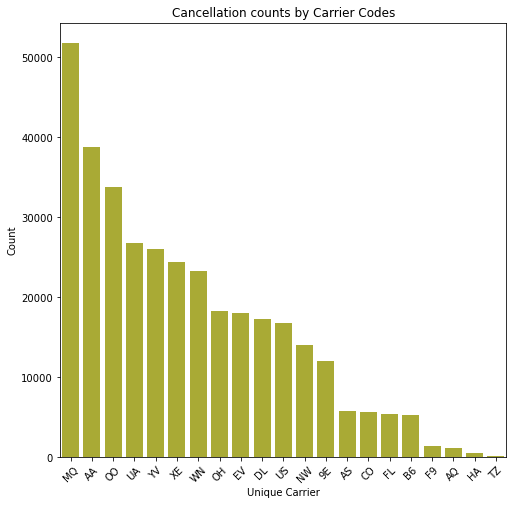

In [53]:
#Identiying the distribution of carriers that had the highest cancellations

#Adding of the various carriers count value
carriers_cancellations=flight_data_sub.unique_carrier.value_counts()

# Plot code
base_color=sb.color_palette()[8]
plt.figure(figsize=(8,8))
flight=sb.countplot(data=flight_data_sub,x='unique_carrier',color=base_color,order=carriers_cancellations.index)
flight.set_xticklabels(labels=carriers_cancellations.index,rotation=45)
plot_labels('Unique Carrier','Count','Cancellation counts by Carrier Codes')

### OBSERVATION

**From tha above plot we can identify that MQ(Envoy Air), AA(American Airline) and OO(Sky West Airline )had the highest cancellation from other carrier which the reason for the cancellation of this top airline are due to the four cancellation code A,B,C,D**

### QUESTION 2: Most common reason for flight cancellation

**For the second plot we look at the causes of cancellation distribution . This plot will help us identify the most cause of flight cancellation over the time**

### VISUALIZATION (2)

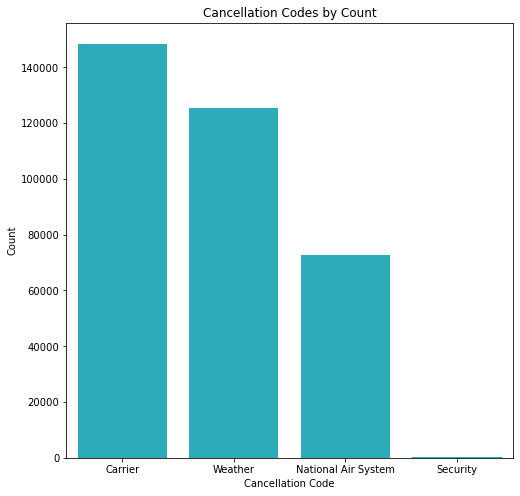

In [54]:
#Plotting the distribution using Seaborn Plot

# Plotting code
base_color=sb.color_palette()[9]
plt.figure(figsize=[8,8])
flight=sb.countplot(data=flight_data,x='cancellation_code',color=base_color,order=['A','B','C','D'])
plot_labels('Cancellation Code','Count','Cancellation Codes by Count')
flight.set_xticklabels(['Carrier','Weather','National Air System','Security']);

### OBSERVATION

**As shown in graph above, it is obvious that A (Carrier) as well as B (Weather) has the height reason why flight are been cancelled.**

### QUESTION 3: Which of the month had the highest cancellation out of all the years?

### VISUALIZATIO (3)

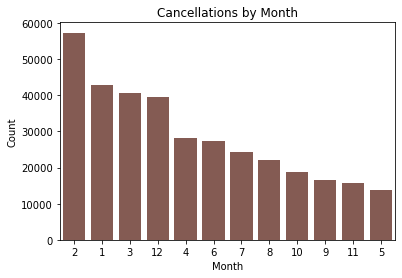

In [55]:
# Plotting code
base_color=sb.color_palette()[5]
month_order=flight_data_sub.month.value_counts()
flight=sb.countplot(data=flight_data_sub,x='month',color=base_color,order=month_order.index)
plot_labels('Month','Count','Cancellations by Month');

### OBSERVATION

**From the plot above we can see that we had the highest cancellation in the first four month which are Febuary,January,March and December respectively. However, We can further investigate into this why we are having the highest cancellation in those month using bivariant plot.** 

### QUESTION 4: Which of the Day of the week had the highest cancellation out of all the years?

### VISUALIZATION (4)

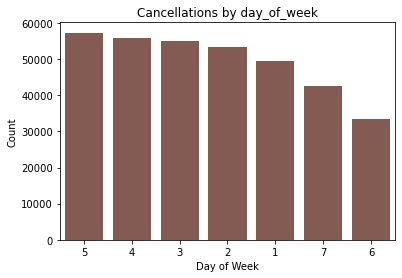

In [56]:
# Plotting code
base_color=sb.color_palette()[5]
day_of_week_order=flight_data_sub.day_of_week.value_counts()
flight=sb.countplot(data=flight_data_sub,x='day_of_week',color=base_color,order=day_of_week_order.index)
plot_labels('Day of Week','Count','Cancellations by day_of_week');

### OBSERVATION

***From the plot above we can see that we had the highest cancellation in Friday, Thursday, Wednesday as well as Tuesday respectively. However, We can further investigate into this why we are having the highest cancellation in those days using Bivariant plot.***

### QUESTION 5: Which of the Year had the highest cancellation out of all the years?

### VISUALIZATION (5)

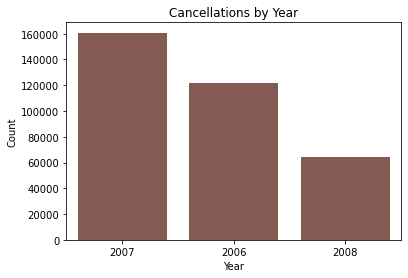

In [57]:
# Plotting code
base_color=sb.color_palette()[5]
year_order=flight_data_sub.year.value_counts()
flight=sb.countplot(data=flight_data_sub,x='year',color=base_color,order=year_order.index)
plot_labels('Year','Count','Cancellations by Year');

### OBSERVATION

***From the plot above we can see that we had the highest cancellation in 2007. However, We can further investigate into this why we are having the highest cancellation in the year 2007 using Bivariant plot.***

### QUESTION 6: What is the distribution of Arrival Delay in the dataset?

### VISUALIZATION (6)

In [58]:
#Removing only datas with arrival_delay information, and excluding NaN
flight_data_arrival_delay=flight_data[flight_data.arrival_delay.notnull()]

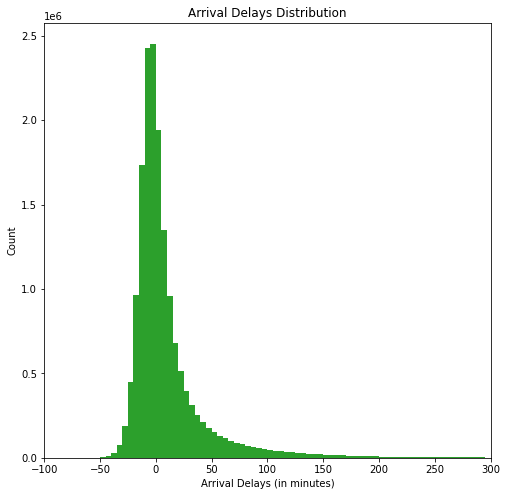

In [59]:
# plotting Code
base_color=sb.color_palette()[2]
plt.figure(figsize=(8,8))
bin_edges=np.arange(-50,300,5)
plt.hist(flight_data_arrival_delay.arrival_delay, bins=bin_edges,color=base_color)
plt.xlim(-100,300)
plot_labels('Arrival Delays (in minutes)','Count','Arrival Delays Distribution')

### QUESTION 7: What is the distribution of departure delay in the dataset

### VISUALIZATION (7)

In [60]:
#Removing only datas with arrival_delay information, and excluding NaN
flight_data_departure_delay=flight_data[flight_data.departure_delay.notnull()]

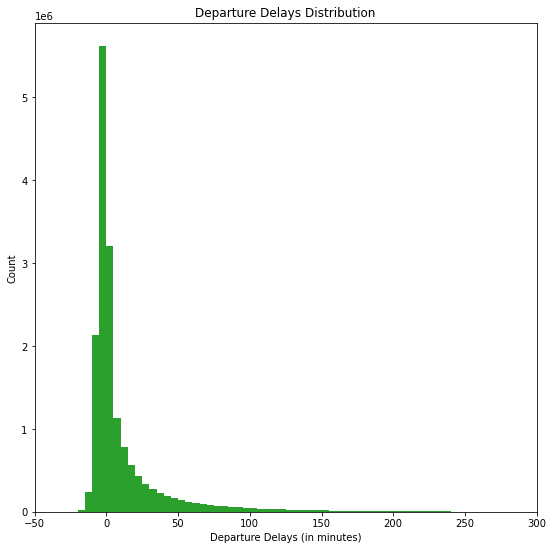

In [61]:
#plotting code
plt.figure(figsize=(9,9))
bin_edges=np.arange(-50,300,5)
plt.hist(flight_data_departure_delay.departure_delay,bins=bin_edges,color=base_color)
plt.xlim(-50,300)
plot_labels('Departure Delays (in minutes)','Count','Departure Delays Distribution')

### OBSERVATION

**From the histogram graphy above it can been seen that the most departure delay occured between the time 0 - 50 minute as we have the graphy skewed to right**

### QUESTION 8: Which of the carriers had the most delays at arrival?

### VISUALIZATION (8)

In [62]:
# Getting the sum of the delays for each carrier by grouping the carrier codes in the dataset
delays_carrier=flight_data_arrival_delay.groupby('unique_carrier').arrival_delay.sum().sort_values(ascending=False)

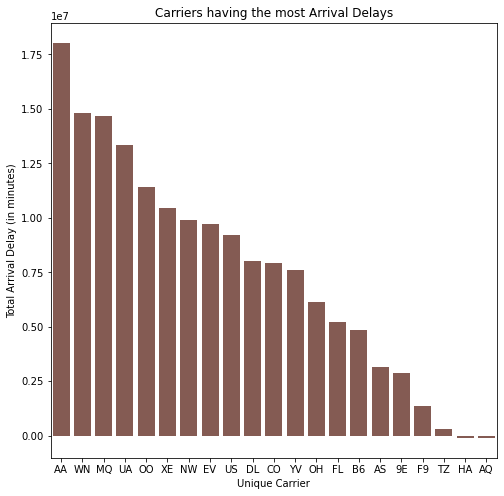

In [63]:
#Bar plotting code

plt.figure(figsize=(8,8))
base_color=sb.color_palette()[5]
flight=sb.barplot(x=delays_carrier.index,y=delays_carrier.values,color=base_color)
plot_labels('Unique Carrier','Total Arrival Delay (in minutes)','Carriers having the most Arrival Delays')

### OBSERVATION

**Looking at the graphy above it can be concluded that AA (Americans Airlines) had the most arrival delay as shown above**

- Under this Univariante I have invesgitaged into some of the feautures by exploring Carrier codes having highest cancellation over a given perid of time in a year as well as Cancellation code.
- It can also be established that Cancellation Code D (Security) has the lowest value count which implies that this code has minimal effect on flight delay as well as cancellation in over a given period of time. 
- Similarly flight arrival as well as departure delay was explored but to get good visualization and information from it I had to transform the plot by adding limits to x axis due to concentration of the data on that axis.

## Bivariate Exploration

> In this section, we would investigate relationships between two variables 


### QUESTION 1: Exploring the relationship between Departure Time and Taxi Out Time using scatter plot

### VISUALIZATION (1)

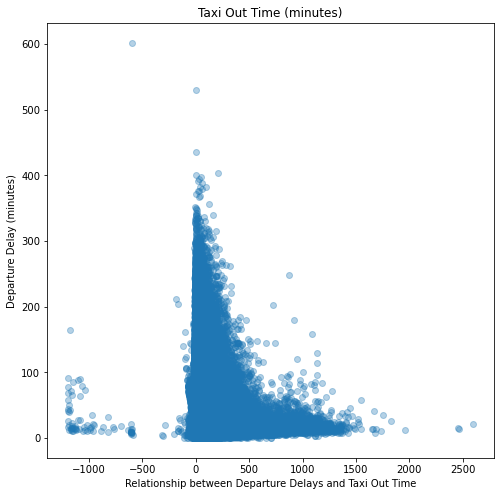

In [64]:
# plotting Code
plt.figure(figsize=(8,8))
plt.scatter(data=flight_data.query('cancelled==0'),x='departure_delay',y='taxi_out_time',alpha=1/3)
plot_labels('Relationship between Departure Delays and Taxi Out Time','Departure Delay (minutes)','Taxi Out Time (minutes)')

### OBSERVATION

***From the graph above it is show that we do not have a linear relationship between departure delay and Taxi out Time***

### QUESTION 2: Exploring the relationship between the Departure Delay and Arrival Delay

### VISUALIZATION (2)

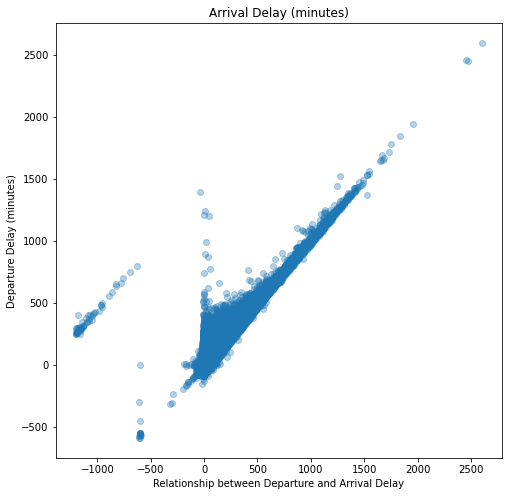

In [65]:
#plotting code
plt.figure(figsize=(8,8))
plt.scatter(data=flight_data.query('cancelled==0'),x='departure_delay',y='arrival_delay',alpha=1/3)
plot_labels('Relationship between Departure and Arrival Delay','Departure Delay (minutes)','Arrival Delay (minutes)')

### OBSERVATION

***From the graphy above we can see that there is linear relationship between Departure Delay and Arrival Delay***

### QUESTION 3: Exploring the most cancellation by month using cancellation code (To see if cancellation has anything to do with season or month)

### VISUALIZATION (3)

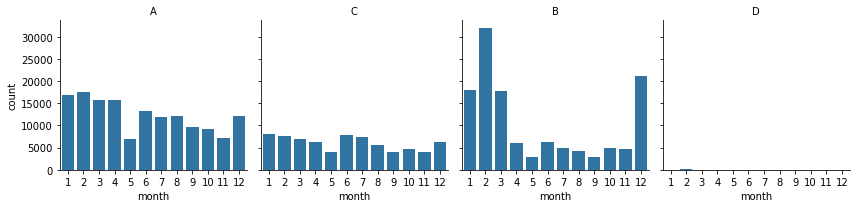

In [66]:
#plotting code
month_order=[1,2,3,4,5,6,7,8,9,10,11,12]
flight=sb.FacetGrid(data=flight_data,col='cancellation_code')
flight.map(sb.countplot,'month',order=month_order)
flight.set_titles("{col_name}");

### OBSERVATION

***From the plot above we can see (B) display the month that has the highest cancellation which are Febuary,December,January and March respectively. (However we can attribute this effect to bad weather because we have B as cancellation due to bad weather.)***

### QUESTION 4: Exploring the most cancellation by Day of week using cancellation code (To see if cancellation has anything to do with days of the week)

### VISUALIZATION (4)

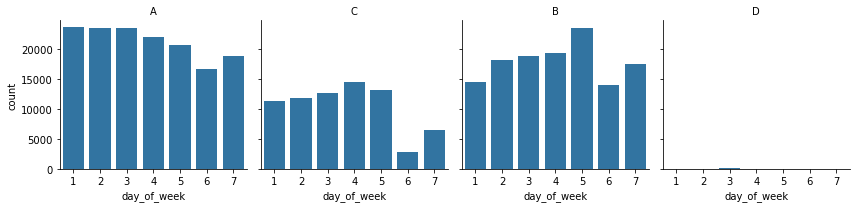

In [67]:
#plotting code
day_of_week_order=[1,2,3,4,5,6,7]
flight=sb.FacetGrid(data=flight_data,col='cancellation_code')
flight.map(sb.countplot,'day_of_week',order=day_of_week_order)
flight.set_titles("{col_name}");

### OBSERVATION

From the plot above we can see (B) and (A) display the Days of week that has the highest cancellation which are Monday,Tuesday,Wednesday and Friday respectively. (However we can attribute this effect to bad weather and Carrier because we have B as cancellation due to bad weather and A due to Carrier.)

### QUESTION 5: Exploring the most cancellation by Year using cancellation code (To see if cancellation has anything to do with Year)

### VISUALIZATION (5)

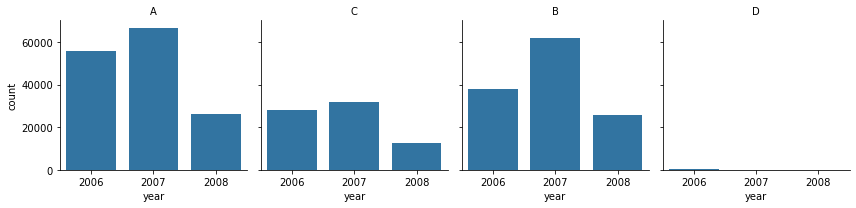

In [68]:
#plotting code
year_order=[2006,2007,2008]
flight=sb.FacetGrid(data=flight_data,col='cancellation_code')
flight.map(sb.countplot,'year',order=year_order)
flight.set_titles("{col_name}");

### OBSERVATION

***From the plot above we can see (B) and (A) display the year that has the highest cancellation which is 2007. (However we can attribute this effect to bad weather and Carrier because we have B as cancellation due to bad weather and A due to Carrier.)***

### QUESTION 6: Exploring the relationship between the flight Distance and Average Arrival Delay

### VISUALIZATION (6)

In [69]:
#Calculating the average arrival delay by distance
distance_arrival=flight_data.query('arrival_delay>0').groupby('distance')['arrival_delay'].mean()

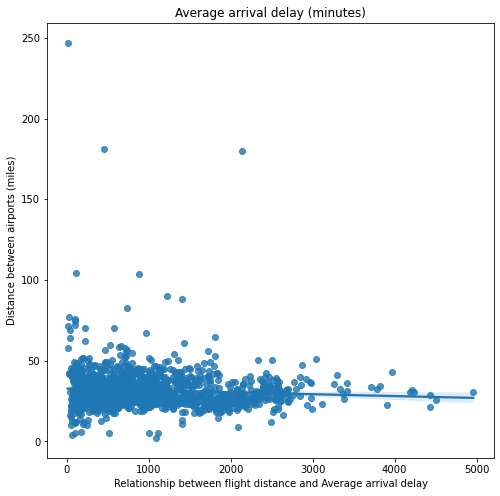

In [70]:
plt.figure(figsize=(8,8))

#Changing the series for seaborn plotting
x,y=pd.Series(distance_arrival.index,name='distance'),pd.Series(distance_arrival.values,name='avg_arrival_delay')
sb.regplot(x=x,y=y)
plot_labels('Relationship between flight distance and Average arrival delay','Distance between airports (miles)','Average arrival delay (minutes)')

### OBSERVATION

***Looking at the plot above we can conclude that there is no rise or fall of trend in average delay as we have the distance between airports rising.***

### QUESTION 7: Exploring Carrier's productivity with respect to Arrival Time

- For this plot we would like to use Stacked bar which will display indicidual carriers base on there Arrival time productivity.
- However, for us to do this we would have to calculate Time productivity by removing all cancelled flights because we are only interested in flight that left the airport.
- Also for us to get flight that has arrival delay >0 which are delayed flight we would have to use (arrival delay) data to calculate this. This will help us to identify the percentage of each carrier flight that got to its destination on time.

### VISUALIZATION (7)

In [71]:
# Determining the Delayed flights which were not cancelled by individual carrier
flight_data_departure_delay=flight_data
arrival_delayed=flight_data_departure_delay.query('cancelled==0 & arrival_delay>0').groupby('unique_carrier').size().reset_index(name='delayed_flights')

In [72]:
# Determining the total flight that left the airport ie not cancelled
uncancelled_flights=flight_data.query('cancelled==0').groupby('unique_carrier').size().reset_index(name='total_flights')

In [73]:
#Combining both arrival_delayed dataframe as well as Uncancelled_flights dataframe on unique_carrier column
flight_combine_delay=pd.merge(arrival_delayed,uncancelled_flights,on='unique_carrier')

In [74]:
#Getting the percentage of delayed flights
flight_combine_delay['delayed_percent']=flight_combine_delay['delayed_flights']/flight_combine_delay['total_flights']*100

In [75]:
#Generating a new column on Time Percentage
flight_combine_delay['on_time_percent']=100-flight_combine_delay.delayed_percent
flight_combine_delay=flight_combine_delay.sort_values(by='delayed_percent',ascending=False)

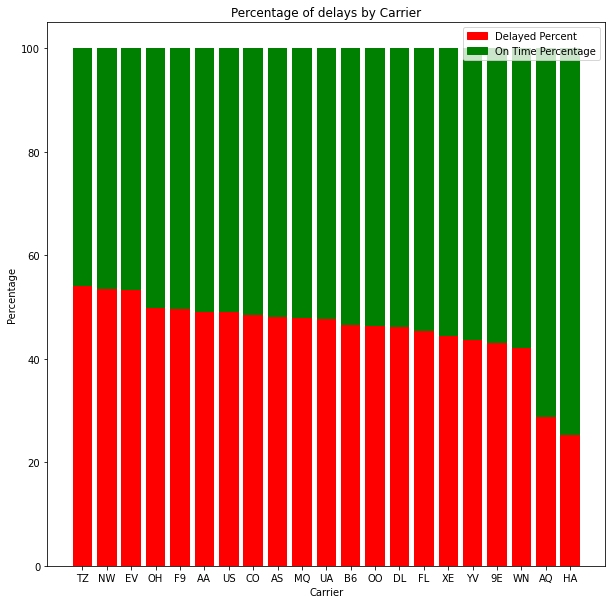

In [77]:
#plotting code
plt.figure(figsize=(10,10))
plt.bar(data=flight_combine_delay,x='unique_carrier',height='on_time_percent',color='green',bottom=flight_combine_delay.delayed_percent)
plt.bar(data=flight_combine_delay,x='unique_carrier',height='delayed_percent',color='red')
red_patch=mpatches.Patch(color='red',label='Delayed Percent')
green_patch=mpatches.Patch(color='green',label='On Time Percentage')
plot_labels('Carrier','Percentage','Percentage of delays by Carrier')
plt.legend(handles=[red_patch,green_patch]);

### OBSERVATION

***From the plot above we can see that the green color represent the total flight that arrived on time while the red represent the total flight that got delayed. Which implies the larger the red color the lower the productivity of the flight***

- However, there was a linear relationship between Arrival Delay and Departure Delay.
- Meanwhile there was no linear relationship between Taxi out time and Departure Delay.
- Also we cannot only rely on relationship between departure and arrival delay plot as we need to explore further using multivariate exploration to see if there is a trend in departure delay as well as taxi out time because of bad weather. 

## Multivariate Exploration

> In this section we would create plots of three or more variables to investigate the relationship between the variables


### QUESTION 1

### (i) What is the trend of each delay factors from month to month? 
### (ii) Which delay factors has the highest effect on flight delays? 
### (iii) Do we have huge variation in any of the delay factors?

### VISUALIZATION (1)

In [78]:
#Generating dataframes that will group delay by month and calculate average delay for each
carrier_by_month=flight_data.query('carrier_delay>0').groupby('month')['carrier_delay'].mean().reset_index(name='carrier_delay')
weather_by_month=flight_data.query('weather_delay>0').groupby('month')['weather_delay'].mean().reset_index(name='weather_delay')
nas_by_month=flight_data.query('nas_delay>0').groupby('month')['nas_delay'].mean().reset_index(name='nas_delay')
security_by_month=flight_data.query('security_delay>0').groupby('month')['security_delay'].mean().reset_index(name='security_delay')
lateaircraft_by_month=flight_data.query('late_aircraft_delay>0').groupby('month')['late_aircraft_delay'].mean().reset_index(name='late_aircraft_delay')

In [79]:

#combining all the dataframes into one
temp=carrier_by_month.merge(weather_by_month,on='month')
temp=temp.merge(nas_by_month,on='month')
temp=temp.merge(security_by_month,on='month')
delays_by_month=temp.merge(lateaircraft_by_month,on='month')

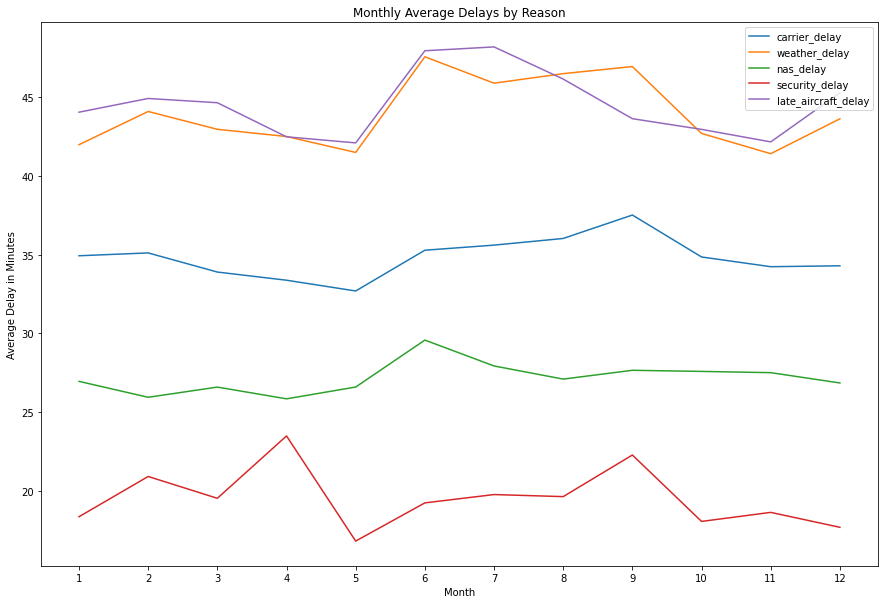

In [80]:
#Trend plotting code

plt.figure(figsize=(15,10))
plt.errorbar(x=delays_by_month.month,y=delays_by_month.carrier_delay,label='carrier_delay')
plt.errorbar(x=delays_by_month.month,y=delays_by_month.weather_delay,label='weather_delay')
plt.errorbar(x=delays_by_month.month,y=delays_by_month.nas_delay,label='nas_delay')
plt.errorbar(x=delays_by_month.month,y=delays_by_month.security_delay,label='security_delay')
plt.errorbar(x=delays_by_month.month,y=delays_by_month.late_aircraft_delay,label='late_aircraft_delay')
plt.legend(loc='upper right')

plot_labels('Month','Average Delay in Minutes','Monthly Average Delays by Reason')
plt.xticks(delays_by_month.month);

### OBSERVATION

**Looking at the plot above we can see that Late_Aircraft_Delay and Weather has the highest effect on flight delay than any other delay factors**

### QUESTION 2

### (i) What is the trend of each delay factors from Day of week to Day of week ?
### (ii) Which delay factors has the highest effect on flight delays?
### (iii) Do we have huge variation in any of the delay factors?

### VISUALIZATION (2)

In [81]:
#Generating dataframes that will group delay by day_of_week and calculate average delay for each
carrier_by_day_of_week=flight_data.query('carrier_delay>0').groupby('day_of_week')['carrier_delay'].mean().reset_index(name='carrier_delay')
weather_by_day_of_week=flight_data.query('weather_delay>0').groupby('day_of_week')['weather_delay'].mean().reset_index(name='weather_delay')
nas_by_day_of_week=flight_data.query('nas_delay>0').groupby('day_of_week')['nas_delay'].mean().reset_index(name='nas_delay')
security_by_day_of_week=flight_data.query('security_delay>0').groupby('day_of_week')['security_delay'].mean().reset_index(name='security_delay')
lateaircraft_by_day_of_week=flight_data.query('late_aircraft_delay>0').groupby('day_of_week')['late_aircraft_delay'].mean().reset_index(name='late_aircraft_delay')

In [82]:

#combining all the dataframes into one
temp=carrier_by_day_of_week.merge(weather_by_day_of_week,on='day_of_week')
temp=temp.merge(nas_by_day_of_week,on='day_of_week')
temp=temp.merge(security_by_day_of_week,on='day_of_week')
delays_by_day_of_week=temp.merge(lateaircraft_by_day_of_week,on='day_of_week')

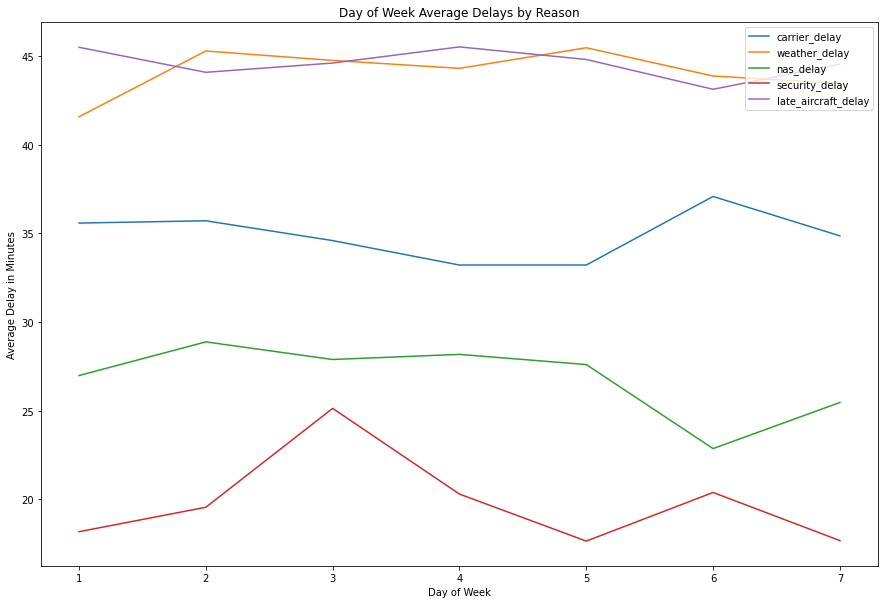

In [83]:
#Trend plotting code

plt.figure(figsize=(15,10))
plt.errorbar(x=delays_by_day_of_week.day_of_week,y=delays_by_day_of_week.carrier_delay,label='carrier_delay')
plt.errorbar(x=delays_by_day_of_week.day_of_week,y=delays_by_day_of_week.weather_delay,label='weather_delay')
plt.errorbar(x=delays_by_day_of_week.day_of_week,y=delays_by_day_of_week.nas_delay,label='nas_delay')
plt.errorbar(x=delays_by_day_of_week.day_of_week,y=delays_by_day_of_week.security_delay,label='security_delay')
plt.errorbar(x=delays_by_day_of_week.day_of_week,y=delays_by_day_of_week.late_aircraft_delay,label='late_aircraft_delay')
plt.legend(loc='upper right')

plot_labels('Day of Week','Average Delay in Minutes','Day of Week Average Delays by Reason')
plt.xticks(delays_by_day_of_week.day_of_week);

### OBSERVATION

***Looking at the plot above we can deduced that both weather and late aircraft delay has the highest delay compared to other factors on all the days of the week.***

### QUESTION 3

### (i) What is the trend of each delay factors from year to year ?
### (ii) Which delay factors has the highest effect on flight delays?
### (iii) Do we have huge variation in any of the delay factors?

In [84]:
#Generating dataframes that will group delay by year and calculate average delay for each
carrier_by_year=flight_data.query('carrier_delay>0').groupby('year')['carrier_delay'].mean().reset_index(name='carrier_delay')
weather_by_year=flight_data.query('weather_delay>0').groupby('year')['weather_delay'].mean().reset_index(name='weather_delay')
nas_by_year=flight_data.query('nas_delay>0').groupby('year')['nas_delay'].mean().reset_index(name='nas_delay')
security_by_year=flight_data.query('security_delay>0').groupby('year')['security_delay'].mean().reset_index(name='security_delay')
lateaircraft_by_year=flight_data.query('late_aircraft_delay>0').groupby('year')['late_aircraft_delay'].mean().reset_index(name='late_aircraft_delay')

In [85]:

#combining all the dataframes into one
temp=carrier_by_year.merge(weather_by_year,on='year')
temp=temp.merge(nas_by_year,on='year')
temp=temp.merge(security_by_year,on='year')
delays_by_year=temp.merge(lateaircraft_by_year,on='year')

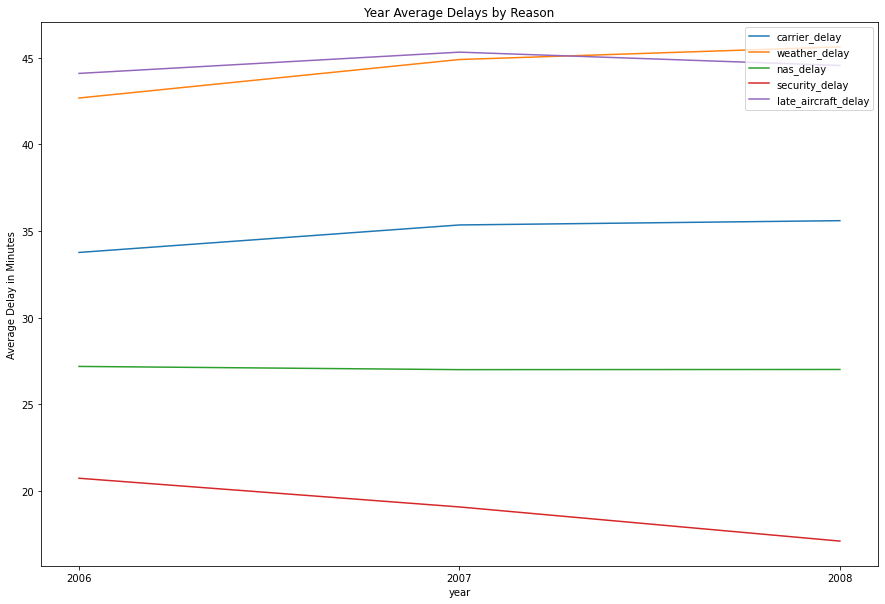

In [86]:
#Trend plotting code

plt.figure(figsize=(15,10))
plt.errorbar(x=delays_by_year.year,y=delays_by_year.carrier_delay,label='carrier_delay')
plt.errorbar(x=delays_by_year.year,y=delays_by_year.weather_delay,label='weather_delay')
plt.errorbar(x=delays_by_year.year,y=delays_by_year.nas_delay,label='nas_delay')
plt.errorbar(x=delays_by_year.year,y=delays_by_year.security_delay,label='security_delay')
plt.errorbar(x=delays_by_year.year,y=delays_by_year.late_aircraft_delay,label='late_aircraft_delay')
plt.legend(loc='upper right')

plot_labels('year','Average Delay in Minutes','Year Average Delays by Reason')
plt.xticks(delays_by_year.year);

### OBSERVATION

***Looking at the plot above we can see that both weather and late aircraft delay has the highest delay compared to other factors on all the years.***

## Conclusions
> - From the plot we can identify huge variation from month to month on delays
> - furthermore,looking at the plot we can identify huge variation from Day of Week to Day of Week on delays
> - However, we can see that there was no huge variation from year to year on delay
> - Also, delay due to security is the least out of all other factor having the lowest variation
> - Finally, from the plot we can conclude that we had the highest delay of the week due to Weather delay on Tuesday and Friday while on Monday and Tuesday Late Aircraft Delay had it highest delay of the week 


## Reference

> - stack over flow
> - geeksforgeeks.org
> - Data Expo 2009
> - udacity classroom materials
> - pandas.pydata.org